In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('datasets/melbourne_house_price.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24197 entries, 0 to 24196
Data columns (total 22 columns):
Suburb                24197 non-null object
Address               24197 non-null object
Rooms                 24197 non-null int64
Type                  24197 non-null object
Price                 24197 non-null float64
Method                24197 non-null object
SellerG               24197 non-null object
Date                  24197 non-null object
Distance              24196 non-null float64
Postcode              24196 non-null float64
Bedroom2              18673 non-null float64
Bathroom              18669 non-null float64
Car                   18394 non-null float64
Landsize              15946 non-null float64
BuildingArea          9609 non-null float64
YearBuilt             10961 non-null float64
CouncilArea           24194 non-null object
Lattitude             18843 non-null float64
Longtitude            18843 non-null float64
Regionname            24194 non-null object
Pr

## Exploring data
#### a) Describe key statistics of 'Rooms'. What is the median and mean value of this column
The mean of rooms is:  2.979873538041906 <br />
The median of rooms is:  3.0
#### b) Bin 'Distance' into 10 bins. How many houses in each bin?
(9.62, 14.43]---7857 <br />
(4.81, 9.62]----7683 <br />
(-0.0491, 4.81]-3476 <br />
(14.43, 19.24]--2817 <br />
(19.24, 24.05]--1209 <br />
(24.05, 28.86]--541 <br />
(28.86, 33.67]--271 <br />
(33.67, 38.48]--265 <br />
(43.29, 48.1]---59 <br />
(38.48, 43.29]--18 <br />
#### c) How many unique vals are in the 'Method' col. What is the number of occurences of these unique values?
S:     15684<br />
SP:     3171<br />
PI:     2854<br />
VB:     2320<br />
SA:      168<br />
#### d) Assume 'Price_above_median' is a binary var of whether a house is priced above the median (875,000) and type is a categorical val representing type of property (house, unit, townhouse). What is the correlation between propety type and price above median?
h-1:                     10293<br />
h-0:                      6010<br />
t-0:                      1373<br />
t-      1:                      1172<br />
u-     0:                      4732<br />
u-      1:                       617<br />

In [2]:
print("The mean of rooms is: ", df['Rooms'].mean())
print("The median of rooms is: ", df['Rooms'].median())

The mean of rooms is:  2.979873538041906
The median of rooms is:  3.0


(9.62, 14.43]      7857
(4.81, 9.62]       7683
(-0.0491, 4.81]    3476
(14.43, 19.24]     2817
(19.24, 24.05]     1209
(24.05, 28.86]      541
(28.86, 33.67]      271
(33.67, 38.48]      265
(43.29, 48.1]        59
(38.48, 43.29]       18
Name: Distance, dtype: int64

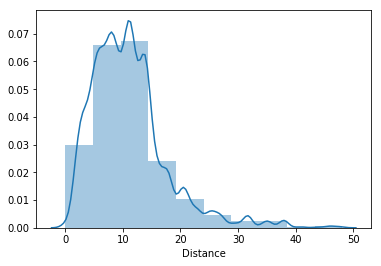

In [3]:
sns.distplot(df['Distance'].dropna(), bins=10)
df['Distance'].value_counts(bins=10)

In [4]:
df['Method'].value_counts()

S     15684
SP     3171
PI     2854
VB     2320
SA      168
Name: Method, dtype: int64

In [5]:
df.groupby(['Type'])['Price_above_median'].value_counts()

Type  Price_above_median
h     1                     10293
      0                      6010
t     0                      1373
      1                      1172
u     0                      4732
      1                       617
Name: Price_above_median, dtype: int64

## Plotting
#### a) Create a dist plot for 'Distance'
#### b) Create a dist plot for 'Type'
#### c) Create a dist plot for 'Rooms'

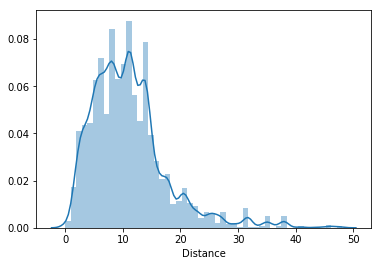

In [6]:
sns.distplot(df['Distance'].dropna())

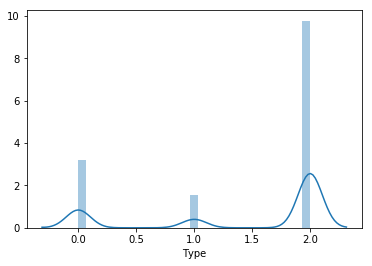

In [7]:
tertiaryMap = {'u': 0, 't':1, 'h':2}
dfType = df['Type'].map(tertiaryMap)
sns.distplot(dfType)

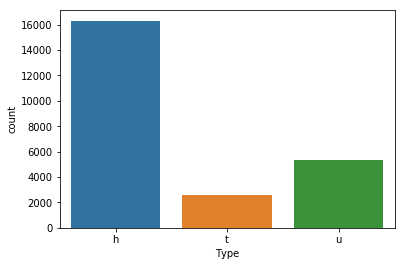

In [8]:
sns.countplot(data=df, x='Type')

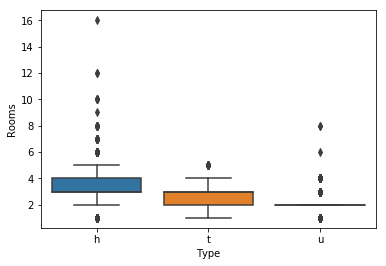

In [9]:
sns.boxplot(x='Type', y='Rooms', data=df)

## Correcting Errors in data
#### a) What problems exist in the dataset?
Index column can be removed using index_col = 0 when importing <br />
Missing values in Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, CouncilArea, Latitude, Longitude, RegionName & Property counts. <br />
>Distance, Postcode, CouncilArea, RegionName & PropertyCount have relatively few rows with missing vals so dropping is the best option. <br />
-<br />
>Bedroom, Bathroom & Car contain values that can be reasonably predicted using mean. Could use median but since training will likely consider them intervals rather than categorical should be fine. <br />
-<br />
>Long and Lat could could be imputed however using a mean for these might skew data unfairly. Better to flag these values. <br />
-<br />
>Landsize, buildingarea and yearbuilt are missing roughly > 1/2 total length and therefore can't be imputed or dropped without damaging data. Flagging prolly wouldn't even be worth it. Drop the cols. <br />

#### b) Is the address column useful? Why?
If the address was a smaller set, eg a number of neighbourhoods were surveyed could clip the street number however its split over too many streets so just drop it.
#### c) Impute missing values in the 'Car' variable. What method to use and why?
Use mean as above since its an interval.
#### d) What is one hot encoding? Perform it on 'Type' and 'Method'.
One hot encoding is the conversion of categorical values into binary vars.
#### e) What columns are not needed
Refer to above. Also could get rid of Address. Price should be removed as its binary result is the target rather than predicting on an interval.
#### f) What data prep can be performed on Date and SellerG
Date is too raw and Seller G is categorical. Could split date into multiple columns and set day, month and year to each one or set it as a single line, that ofc could cause issues in the future or past depending on the input data. SellerG is categorical however has the potential to be continuous by expanding in the future. Easiest to drop this as a seller may only have 1 house, flooding the dataset with worthless values.

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24197 entries, 0 to 24196
Data columns (total 22 columns):
Suburb                24197 non-null object
Address               24197 non-null object
Rooms                 24197 non-null int64
Type                  24197 non-null object
Price                 24197 non-null float64
Method                24197 non-null object
SellerG               24197 non-null object
Date                  24197 non-null object
Distance              24196 non-null float64
Postcode              24196 non-null float64
Bedroom2              18673 non-null float64
Bathroom              18669 non-null float64
Car                   18394 non-null float64
Landsize              15946 non-null float64
BuildingArea          9609 non-null float64
YearBuilt             10961 non-null float64
CouncilArea           24194 non-null object
Lattitude             18843 non-null float64
Longtitude            18843 non-null float64
Regionname            24194 non-null object
Pr

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Price_above_median
count,24197.000000,2.419700e+04,24196.000000,24196.000000,18673.000000,18669.000000,18394.000000,15946.000000,9609.000000,10961.000000,18843.000000,18843.000000,24194.000000,24197.000000
mean,2.979874,1.052590e+06,11.069598,3112.252604,3.009158,1.576678,1.688214,591.972595,154.967878,1966.413375,-37.808117,144.996710,7553.879474,0.499318
std,0.960262,6.444995e+05,6.644708,107.620219,0.966819,0.701306,0.988789,3961.770145,468.338870,36.781273,0.089079,0.117219,4496.632709,0.500010
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,83.000000,0.000000
25%,2.000000,6.350000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,202.000000,98.000000,1950.000000,-37.860100,144.926710,4294.000000,0.000000
50%,3.000000,8.750000e+05,10.300000,3088.000000,3.000000,1.000000,2.000000,489.000000,130.000000,1970.000000,-37.801200,145.002600,6567.000000,0.000000
75%,4.000000,1.300000e+06,13.900000,3152.000000,4.000000,2.000000,2.000000,661.000000,180.000000,2000.000000,-37.750905,145.066600,10331.000000,1.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2018.000000,-37.397800,145.526350,21650.000000,1.000000


In [11]:
df['Car'].fillna(df['Car'].mean(), inplace=True)

In [12]:
print(df['Type'].value_counts())
df['Method'].value_counts()

h    16303
u     5349
t     2545
Name: Type, dtype: int64


S     15684
SP     3171
PI     2854
VB     2320
SA      168
Name: Method, dtype: int64

In [13]:
df['Method'] = pd.get_dummies(df['Method'])
df['Type'] = pd.get_dummies(df['Type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24197 entries, 0 to 24196
Data columns (total 22 columns):
Suburb                24197 non-null object
Address               24197 non-null object
Rooms                 24197 non-null int64
Type                  24197 non-null uint8
Price                 24197 non-null float64
Method                24197 non-null uint8
SellerG               24197 non-null object
Date                  24197 non-null object
Distance              24196 non-null float64
Postcode              24196 non-null float64
Bedroom2              18673 non-null float64
Bathroom              18669 non-null float64
Car                   24197 non-null float64
Landsize              15946 non-null float64
BuildingArea          9609 non-null float64
YearBuilt             10961 non-null float64
CouncilArea           24194 non-null object
Lattitude             18843 non-null float64
Longtitude            18843 non-null float64
Regionname            24194 non-null object
Prop

In [14]:
df = df.drop(['Address', 'Landsize', 'BuildingArea', 'YearBuilt', 'Price'], axis=1)

In [16]:
df['SellerG']

0               Biggin
1               Biggin
2               Biggin
3               Biggin
4               Nelson
5               Jellis
6               Nelson
7               Nelson
8               Jellis
9               Jellis
10              Biggin
11              Biggin
12              Dingle
13              Biggin
14        Purplebricks
15              Jellis
16              Nelson
17              Biggin
18              Biggin
19              Biggin
20              Biggin
21                Greg
22              Jellis
23              Jellis
24              Jellis
25              LITTLE
26             Collins
27              Biggin
28                 Kay
29              Beller
             ...      
24167          Burnham
24168    hockingstuart
24169              Jas
24170          Sweeney
24171              YPA
24172    hockingstuart
24173            Barry
24174            Mason
24175              HAR
24176         Williams
24177          Sweeney
24178          Sweeney
24179      